In [1]:
from utils import capture_video, save_video
from tracker import PlayerTracker
from tracker import BallTracker
from tracker import CourtKpsDetector

In [13]:
input_video_path = "input_videos/input_video.mp4"
video_frames = capture_video(input_video_path)

player_tracker = PlayerTracker(model_path="./yolov8x.pt")
ball_tracker = BallTracker(model_path="models/last_100.pt")
kpts_detector = CourtKpsDetector(model_path="./kps_model.pth")

player_detection = player_tracker.detect_frames(video_frames, read_from_stub=True, stub_path="tracker_stubs/player_detection.pkl")
ball_detection = ball_tracker.detect_frames(video_frames, read_from_stub=True, stub_path="tracker_stubs/ball_detection.pkl")
ball_detection = ball_tracker.interpolate_ball_positions(ball_detection)
court_keypoints = kpts_detector.predict(video_frames[0])
video_frames = player_tracker.draw_bboxes(video_frames, player_detection)
video_frames = ball_tracker.draw_bboxes(video_frames, ball_detection)
video_frames  = kpts_detector.draw_keypoints_on_video(video_frames, court_keypoints)
        

/home/laksh/miniconda3/envs/research/lib/python3.12/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/laksh/miniconda3/envs/research/lib/python3.12/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [10]:
import matplotlib.pyplot as plt
import numpy as np

In [37]:
player_detection[0]

{1: [480.2899169921875,
  751.6080322265625,
  624.820556640625,
  930.5987548828125],
 2: [1030.575439453125,
  201.66860961914062,
  1095.8953857421875,
  308.5273132324219],
 3: [1494.94482421875, 77.82682037353516, 1544.828125, 195.39285278320312],
 4: [1609.7197265625,
  276.98101806640625,
  1681.4879150390625,
  389.99603271484375],
 5: [387.421875, 72.44270324707031, 424.3581848144531, 198.63111877441406],
 7: [149.93612670898438,
  379.4345397949219,
  243.3595733642578,
  503.1763000488281],
 8: [881.7991333007812,
  38.28778839111328,
  913.5726928710938,
  82.61048126220703],
 10: [34.39759063720703,
  314.28192138671875,
  89.16619873046875,
  425.7089538574219]}

In [59]:
center_coordinates = {}
for player in player_detection[0].keys():
    x1, y1, x2, y2 = player_detection[0][player]
    cc = [x1+ ((x2-x1)/2), y1+ ((y2-y1)/2)]
    center_coordinates[player] = cc


In [60]:
center_coordinates

{1: [552.5552368164062, 841.1033935546875],
 2: [1063.2354125976562, 255.09796142578125],
 3: [1519.886474609375, 136.60983657836914],
 4: [1645.6038208007812, 333.488525390625],
 5: [405.89002990722656, 135.5369110107422],
 7: [196.6478500366211, 441.305419921875],
 8: [897.6859130859375, 60.449134826660156],
 10: [61.78189468383789, 369.9954376220703]}

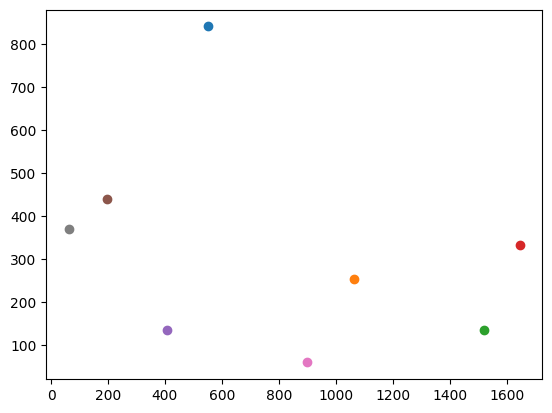

In [ ]:
center_coordinates = list(center_coordinates.values())

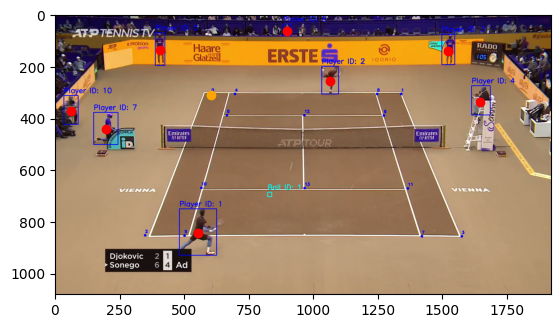

In [57]:
plt.imshow(video_frames[0])
for coordinate in center_coordinates:
    plt.scatter(coordinate[0], coordinate[1], color = "red")
    
plt.scatter(604.29, 308.53, color = "orange")

In [56]:
court_keypoints

array([     604.29,      308.53,      1337.8,      308.98,      348.48,      853.44,      1571.5,      857.78,      695.89,      308.53,       500.8,      854.01,      1244.7,      308.97,      1417.8,      857.37,      664.17,      390.88,      1270.2,      391.33,       565.1,      670.57,      1363.6,      672.91,
            963.55,      390.94,       964.9,      671.68], dtype=float32)

In [58]:
center_coordinates

[[552.5552368164062, 841.1033935546875],
 [1063.2354125976562, 255.09796142578125],
 [1519.886474609375, 136.60983657836914],
 [1645.6038208007812, 333.488525390625],
 [405.89002990722656, 135.5369110107422],
 [196.6478500366211, 441.305419921875],
 [897.6859130859375, 60.449134826660156],
 [61.78189468383789, 369.9954376220703]]

In [ ]:
def euclidean_distance(point1, point2):
    return np.sqrt(np.sum((np.array(point1) - np.array(point2)) ** 2))

In [62]:
nearest_players

[(7, np.float64(173.57568865381108)), (5, np.float64(198.50837474622298))]

In [64]:
center_coordinates[11] = [51, 52]

In [66]:
center_coordinates[11] = 25

In [69]:
court_keypoints

array([     604.29,      308.53,      1337.8,      308.98,      348.48,      853.44,      1571.5,      857.78,      695.89,      308.53,       500.8,      854.01,      1244.7,      308.97,      1417.8,      857.37,      664.17,      390.88,      1270.2,      391.33,       565.1,      670.57,      1363.6,      672.91,
            963.55,      390.94,       964.9,      671.68], dtype=float32)

In [79]:
def euclidean_distance(point1, point2):
    return np.sqrt(np.sum((np.array(point1) - np.array(point2)) ** 2))

In [ ]:
def 

In [134]:
def euclidean_distance(point1, point2):
    return np.sqrt(np.sum((np.array(point1) - np.array(point2)) ** 2))

def calculate_min_distance(court_keypoints, center_coord):
    d_min = 100000
    for i in range(0, len(court_keypoints), 2):
        pair = court_keypoints[i:i+2]  
        pair = [float(pair[0]), float(pair[1])]
        if d_min > euclidean_distance(pair, center_coord):
            d_min = euclidean_distance(pair, center_coord)
        
    return d_min
        
        
# float(calculate_min_distance(court_keypoints,))

In [135]:
def choose_players(court_keypoints, center_coordinates):
    for i, p_nums in enumerate(list(center_coordinates.keys())):
        center_coordinates[p_nums] = float(calculate_min_distance(court_keypoints, center_coordinates[p_nums]))
        center_coordinates = dict(sorted(center_coordinates.items(), key=lambda item: item[1]))
        
    return center_coordinates

In [136]:
choose_players(court_keypoints, center_coordinates)

{2: 84.27978969893475,
 10: 126.04555847776095,
 7: 212.7693858077086,
 8: 284.7242190798465,
 4: 295.5288019313692,
 5: 344.0573984778654,
 3: 358.2641973069685,
 1: 607.1875445243483}